In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file={
    "oi_a0": ["3gram_ordered_inbound_alpha0.0_1to5_mpht"],
    "oi_a0.01": ["3gram_ordered_inbound_alpha0.01_1to5_mpht"],
    "oi_a0.1": ["3gram_ordered_inbound_alpha0.1_1to5_mpht"],
    "oi_a0.25": ["3gram_ordered_inbound_alpha0.25_1to5_mpht"],
    "oi_a0.5": ["3gram_ordered_inbound_alpha0.5_1to5_mpht"],

    "oi_a0.1+": ['3gram_ordered_inbound_alpha0.1_1to5_mega_text'],
    
    "ri_a0": ["3gram_random_inbound_alpha0.0_1to5_mpht"],
    "ri_a0.01": ["3gram_random_inbound_alpha0.01_1to5_mpht"],
    "ri_a0.1": ["3gram_random_inbound_alpha0.1_1to5_mpht"],
    "ri_a0.25": ["3gram_random_inbound_alpha0.25_1to5_mpht"],
    "ri_a0.5": ["3gram_random_inbound_alpha0.5_1to5_mpht"],
    
    "ot_ow_i_a0.01": ["3gram_ordered_text_ordered_window_inbound_alpha0.01_1to5_mpht"],
    "ot_ow_i_a0.1": ["3gram_ordered_text_ordered_window_inbound_alpha0.1_1to5_mpht"],
    "ot_rw_i_a0.01": ["3gram_ordered_text_random_window_inbound_alpha0.01_1to5_mpht"],
    "ot_rw_i_a0.1": ["3gram_ordered_text_random_window_inbound_alpha0.1_1to5_mpht"],
    
    "rt_ow_i_a0.01": ["3gram_random_text_ordered_window_inbound_alpha0.01_1to5_mpht"],
    "rt_ow_i_a0.1": ["3gram_random_text_ordered_window_inbound_alpha0.1_1to5_mpht"],
    "rt_rw_i_a0.01": ["3gram_random_text_random_window_inbound_alpha0.01_1to5_mpht"],
    "rt_rw_i_a0.1": ["3gram_random_text_random_window_inbound_alpha0.1_1to5_mpht"],
    
    "oi_a0.1_train(90)_test(10)": ['3gram_ordered_inbound_alpha0.1_1to5_train(mega_text_90)_test(mega_text_10)'],
    "ri_a0.1_train(90)_test(10)": ['3gram_random_inbound_alpha0.1_1to5_train(mega_text_90)__test(mega_text_10)'],
}

In [34]:
df= pd.read_csv(file["oi_a0.1_train(90)_test(10)"][0], index_col=0, parse_dates=True)
print('ordered inbound train(90), test(10)')
df['h_wordorder'] = df['h_words'] - df['h_wordset']
df

ordered inbound train(90), test(10)


,h_words,h_wordset,h_wordorder
0,9.996865,9.996865,0.000000
1,11.861190,11.607466,0.253723
2,17.174784,16.935781,0.239003
3,22.527446,21.703070,0.824376
4,27.855794,24.496358,3.359436


In [35]:
df = pd.read_csv(file["ri_a0.1_train(90)_test(10)"][0], index_col=0, parse_dates=True)
print('random inbound train(90), test(10)')
df['h_wordorder'] = df['h_words'] - df['h_wordset']
df

random inbound train(90), test(10)


,h_words,h_wordset,h_wordorder
0,10.001012,10.001012,0.000000
1,13.744844,13.181608,0.563236
2,18.767574,18.251467,0.516107
3,23.793229,22.675691,1.117538
4,28.817054,25.808416,3.008637


In [ ]:
# For a random training set, for each window size, 
# entropy in h_words will be greater than that found in the ordered training set

# This makes sense, because there is inherently more randomness in the random training set's ordering of tokens
# What does the difference between these h_words look like (ri - oi)?

# Predictability of the next word is what we are measuring. The strength of this will,
# in part, be determined by the ngram model we are using (2gram, 3gram, 4gram, etc.)

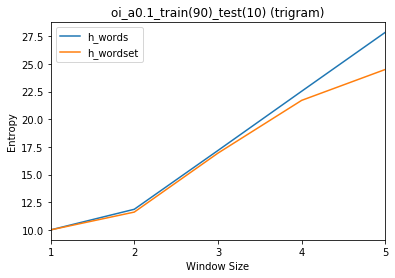

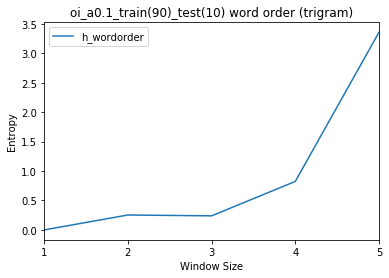

In [31]:
name = 'oi_a0.1_train(90)_test(10)'
# name = "ot_ow_i_a0.1"
# name = "oi_a0.1+"
df_oi = pd.read_csv(file[name][0], index_col=0, parse_dates=True)
df_oi['window_size'] = [1,2,3,4,5]
df_oi['type'] = [name+"_mpht"]*5
# df_oi
ax = df_oi.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
df_oi['h_wordorder'] = df_oi['h_words'] - df_oi['h_wordset']

ax = df_oi.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
plt.show()

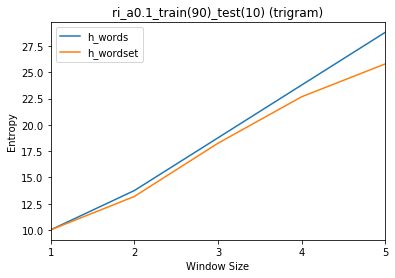

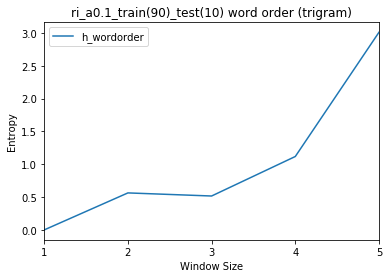

In [32]:
name = "ri_a0.1_train(90)_test(10)"
# name = "ot_rw_i_a0.1"

df_ri = pd.read_csv(file[name][0], index_col=0, parse_dates=True)
df_ri['window_size'] = [1,2,3,4,5]
ax = df_ri.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
plt.show()
df_ri['h_wordorder'] = df_ri['h_words'] - df_ri['h_wordset']
# df['max_h_wordorder'] = np.log(np.math.factorial(np.array([int(w) for w in df['window_size']])))

ax = df_ri.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
plt.show()

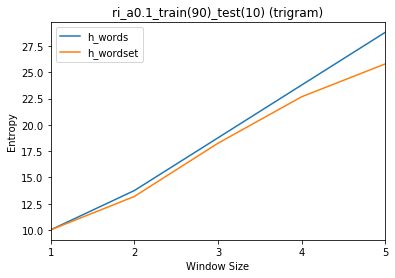

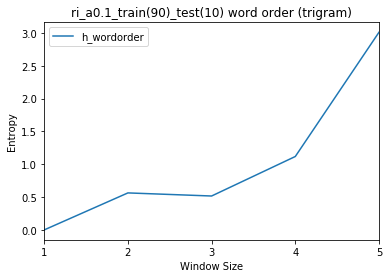

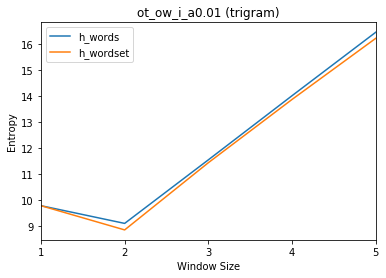

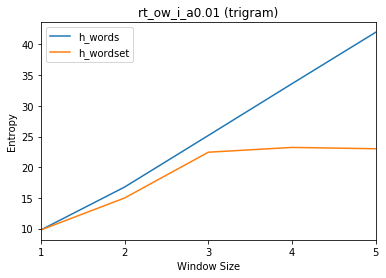

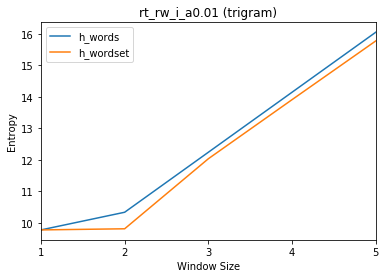

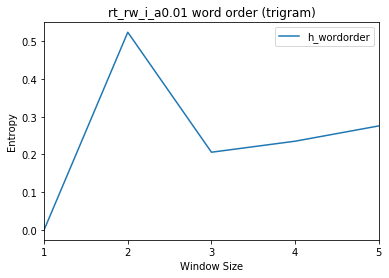

In [90]:
name = "ot_ow_i_a0.01"
# name = "ot_rw_i_a0.1"

df_ri = pd.read_csv(file[name][0], index_col=0, parse_dates=True)
df_ri['window_size'] = [1,2,3,4,5]
ax = df_ri.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
plt.show()

name = "rt_ow_i_a0.01"
# name = "ot_rw_i_a0.1"

df_ri = pd.read_csv(file[name][0], index_col=0, parse_dates=True)
df_ri['window_size'] = [1,2,3,4,5]
ax = df_ri.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
# plt.show()

# df_ri
name = 'rt_rw_i_a0.01'
# name = "ot_ow_i_a0.1"
# name = "oi_a0.1+"
df_oi = pd.read_csv(file[name][0], index_col=0, parse_dates=True)
df_oi['window_size'] = [1,2,3,4,5]
df_oi['type'] = [name+"_mpht"]*5
# df_oi
ax = df_oi.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
df_oi['h_wordorder'] = df_oi['h_words'] - df_oi['h_wordset']

ax = df_oi.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
plt.show()

In [21]:
import scipy.special

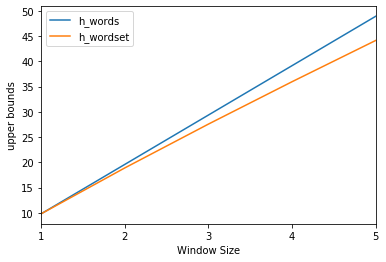

In [36]:
df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
df['upper_bounds'] = [0, 1, 2.584962500721156, 4.584962500721156,  6.906890595608519]
df['h_words'] = 9.781669 * df['window_size'] 
df['h_wordset'] = df['h_words'] - np.log(scipy.special.factorial(df['window_size']))
df['exponential'] = [1,2,6,24,120]
ax = df.plot(x="window_size", y=['h_words', 'h_wordset'])
# ax = df.plot(x="window_size", y=['exponential'])
ax.set(xlabel="Window Size", ylabel="upper bounds")
ax.set_xticks(range(1,6,1))
# plt.show()
            


In [27]:
df['h_wordorder'] = df['h_words'] - df['h_wordset']

ax = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,6,1))
plt.show()

KeyError: 'h_words'

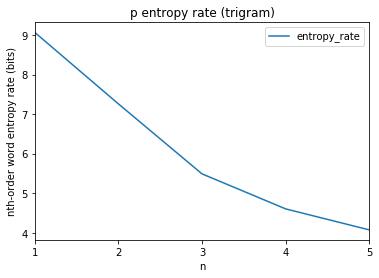

In [65]:
# df['entropy_rate'] = df['h_words'] / df['window_size']
# ax = df.plot(x="window_size", y=['entropy_rate'], title=text+" entropy rate (trigram)")
# ax.set(xlabel="n", ylabel="nth-order word entropy rate (bits)")
# ax.set_xticks(range(1,8,1))
# plt.show()

df['entropy_rate'] = df['h_words'] / df['window_size']
ax = df.plot(x="window_size", y=['entropy_rate'], title=text+" entropy rate (trigram)")
ax.set(xlabel="n", ylabel="nth-order word entropy rate (bits)")
ax.set_xticks(range(1,6,1))
plt.show()

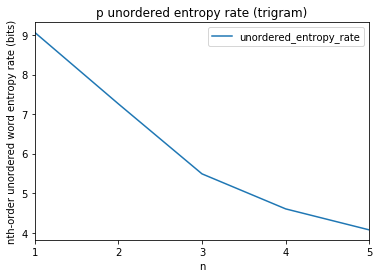

In [66]:
# df['unordered_entropy_rate'] = df['h_words'] / df['window_size']
# ax = df.plot(x="window_size", y=['unordered_entropy_rate'], title=text+" unordered entropy rate (trigram)")
# ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate (bits)")
# ax.set_xticks(range(1,8,1))
# plt.show()

df['unordered_entropy_rate'] = df['h_words'] / df['window_size']
ax = df.plot(x="window_size", y=['unordered_entropy_rate'], title=text+" unordered entropy rate (trigram)")
ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate (bits)")
ax.set_xticks(range(1,6,1))
plt.show()

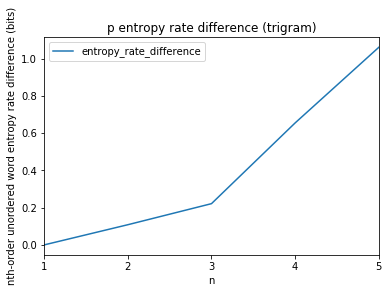

In [67]:
# df['entropy_rate_difference'] = (df['h_words'] - df['h_wordset']) / df['window_size']
# ax = df.plot(x="window_size", y=['entropy_rate_difference'], title=text+" entropy rate difference (trigram)")
# ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate difference (bits)")
# ax.set_xticks(range(1,8,1))
# plt.show()

df['entropy_rate_difference'] = (df['h_words'] - df['h_wordset']) / df['window_size']
ax = df.plot(x="window_size", y=['entropy_rate_difference'], title=text+" entropy rate difference (trigram)")
ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate difference (bits)")
ax.set_xticks(range(1,6,1))
plt.show()
